

# IMAGE CLASSIFICATION USING CONVOLUTION NEURAL NETWORK(CNN)


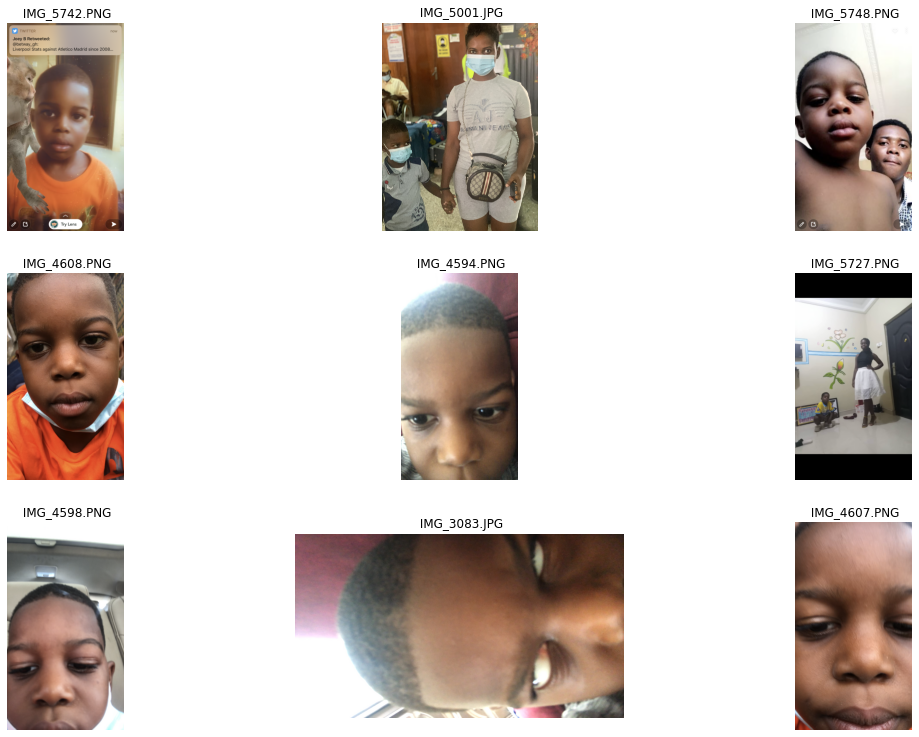

In [48]:
import matplotlib.pyplot as plt
import random
import os

path = 'desktop/we/ImagesUs/prempeh/'
ddimages = os.listdir(path)
fig,ax = plt.subplots(3,3,figsize=(20,13))

for idx,imgs in enumerate(random.sample(images,9)):
    read = plt.imread(path + imgs)
    ax[int(idx/3),idx%3].imshow(read)
    ax[int(idx/3),idx%3].axis('off')
    ax[int(idx/3),idx%3].set_title(f' {imgs}')
    
plt.show()

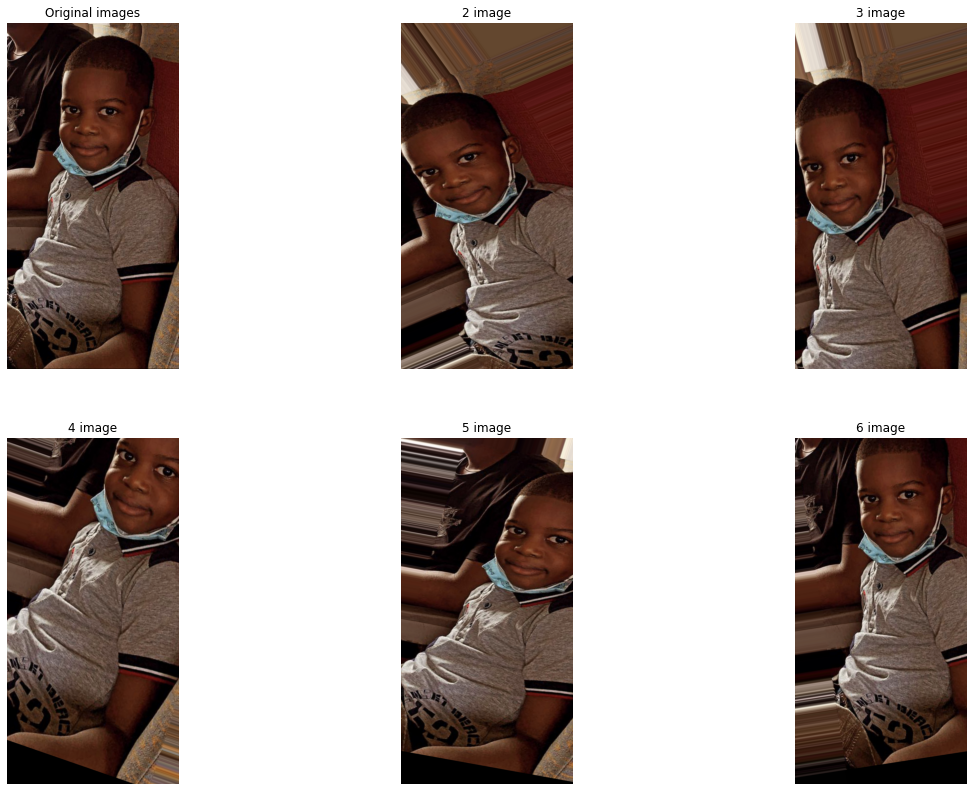

In [63]:
# from keras.preprocessing.image import ImageDataGenerator
# image_generator = ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,
#                                     horizontal_flip=True,zoom_range=0.2,fill_mode='nearest')

#plotting an original image against an augmented image
#we augment the image to add more images to our data since CNN needs augmented image to function properly

train_path = 'desktop/we/ImagesUs/Train/prempeh/'
image = os.listdir(train_path)
fig,ax = plt.subplots(2,3,figsize=(20,14))
all_images = []

#original image and adding it to all_images list
random_img = random.sample(image,1)[0] #the '[0]' just take the string of image removing the square braces
random_img = plt.imread(train_path + random_img)
all_images.append(random_img)

#augmenting the image using ImageDataGenerator
random_img = random_img.reshape((1,) + random_img.shape)#images to be passed to ImageDataGenerator must be reshaped
sample_augmented_imgs = image_generator.flow(random_img)


#appending augmented images to all_images
for _ in range(5):
    augmented_imgs = sample_augmented_imgs.next()
    for img in augmented_imgs:
        all_images.append(img.astype('uint8'))

#plotting my 
for idx,img in enumerate(all_images):
    ax[int(idx/3),idx%3].imshow(img)
    ax[int(idx/3),idx%3].axis('off')
    if idx==0:
        ax[int(idx/3),idx%3].set_title('Original images')
    else:
        ax[int(idx/3),idx%3].set_title(f'{idx+1} image')
    
plt.show()


In [87]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

FILTER_SIZE = 3
NUM_FLITER = 32
INPUT_SIZE = 32
POOL_SIZE = 2
BATCH_SIZE = 16
STEPS_PER_EPOCH = 48//BATCH_SIZE #the number of iteration in each epoch
EPOCHS = 10 #number of times the model sees the training sample



model = Sequential()

model.add(Conv2D(NUM_FLITER, (FILTER_SIZE,FILTER_SIZE),input_shape=(INPUT_SIZE,INPUT_SIZE,3),activation='relu'))
model.add(MaxPool2D(pool_size=(POOL_SIZE,POOL_SIZE)))

model.add(Conv2D(NUM_FLITER, (FILTER_SIZE,FILTER_SIZE),input_shape=(INPUT_SIZE,INPUT_SIZE,3),activation='relu'))
model.add(MaxPool2D(pool_size=(POOL_SIZE,POOL_SIZE)))

model.add(Flatten())

model.add(Dense(units=64,activation='relu')) #units of nodes

model.add(Dropout(0.5))#making some of the values(50%) 0 so bigger values dont dominate the smaller

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#training the training_data
image_generator = ImageDataGenerator(rescale=1./255)
training_data = image_generator.flow_from_directory('desktop/we/ImagesUs/Train/',target_size=(INPUT_SIZE,INPUT_SIZE),
                                                   batch_size=BATCH_SIZE, class_mode='binary')
model.fit_generator(training_data,steps_per_epoch=STEPS_PER_EPOCH,epochs=EPOCHS)



Found 96 images belonging to 2 classes.


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 0.7226 - accuracy: 0.5208
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 0.6945 - accuracy: 0.4792
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.6829 - accuracy: 0.5417
Epoch 4/10
3/3 [==============================] - 5s 1s/step - loss: 0.6789 - accuracy: 0.5208
Epoch 5/10
3/3 [==============================] - 5s 1s/step - loss: 0.7009 - accuracy: 0.4792
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.6373 - accuracy: 0.6458
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.6450 - accuracy: 0.6667
Epoch 8/10
3/3 [==============================] - 5s 2s/step - loss: 0.6495 - accuracy: 0.6458
Epoch 9/10
3/3 [==============================] - 5s 2s/step - loss: 0.6011 - accuracy: 0.8125
Epoch 10/10
3/3 [==============================] - 6s 2s/step - loss: 0.5972 - accuracy: 0.7083


In [88]:
#TESTING the training_data
image_generator = ImageDataGenerator(rescale=1./255)
testing_data = image_generator.flow_from_directory('desktop/we/ImagesUs/Test/',target_size=(INPUT_SIZE,INPUT_SIZE),
                                                   batch_size=BATCH_SIZE, class_mode='binary')
score = model.evaluate_generator(training_data,steps=len(testing_data))
for idx,metric in enumerate(model.metrics_names):
    print(f'{metric}, {score[idx]}')
    
    
    
    
#Wow CNN did a good job here. The images are not even up to 150 but it could learn it very well and give accuracy 
# 78% right predictionn

Found 24 images belonging to 2 classes.


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss, 0.5774790048599243
accuracy, 0.78125


In [114]:
import numpy as np
import pandas as pd
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'desktop/we/ImagesUs/Test/',
        target_size=(32, 32),
        color_mode="rgb",
        shuffle = False,
        class_mode='binary',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)


predict = model.predict_generator(test_generator,steps = nb_samples)

#Get classes by np.round
bin_class = np.round(predict)



#DataFrame
results=pd.DataFrame({"filename":filenames,"prediction":predict[:,0], "class":bin_class[:,0]})
results

Found 24 images belonging to 2 classes.


,filename,prediction,class
0,emma/3B36F219-B3D4-4077-A954-856F774CE2C6.JPG,0.379892,0.0
1,emma/3D5E9DCE-035E-4D05-9DA6-E178A3F41701.JPG,0.326483,0.0
2,emma/3F1C87DD-EE7B-4D9C-A360-4E1C728FDDAD.JPG,0.570182,1.0
3,emma/69EE1200-4162-47B3-BCD0-D50AE5C3CBCD.JPG,0.304371,0.0
4,emma/A9DCAF80-4129-4BF4-9A73-490DAFAF717D.JPG,0.539698,1.0
5,emma/CECFA779-59E5-4536-B247-3C7A893CBC66.JPG,0.592243,1.0
6,emma/E8AD234D-1CE0-4B27-B19B-BFF8729BB47E.JPG,0.317307,0.0
7,emma/IMG_0290.JPG,0.521683,1.0
8,emma/IMG_0317.JPG,0.516597,1.0
9,emma/IMG_0724.JPG,0.456058,0.0


## The Convolution Neural Network did a great job here. It made just some few errors,probably because  I resemble my brother. So I belonged to the '0 class' and my brother belongs to the '1 class'


# Benefit of trying this image classification differently(using I and my brothers' pictures)

### 1. Discovered that matplotlibs' imshow cant open HEIC images. so i had to either delete or change the extension to jpg
### 2. Sometimes changing original extension corrupts the image
### 3.DS_store is apple file which helps open images in 'Finder' quickly. but you have to remove it from images by:
### rm desktop/we/ImagesUs/Test/prempeh/.DS_Store



